In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [26]:
name = 'hercules_forewing_n=20'
wing = np.genfromtxt(f'{name}.csv')
#wing=.25*wing

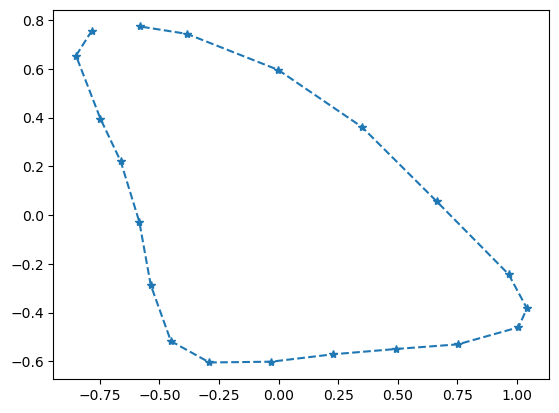

In [27]:
plt.plot(wing[::2], wing[1::2], '--*')

## Create variations over wing

In [28]:
small = 0.5*wing
large = 1.5*wing 
moved = wing + 1.5

np.savetxt(f'small_{name}.csv', small)
np.savetxt(f'large_{name}.csv', large)
np.savetxt(f'moved_{name}.csv', moved)

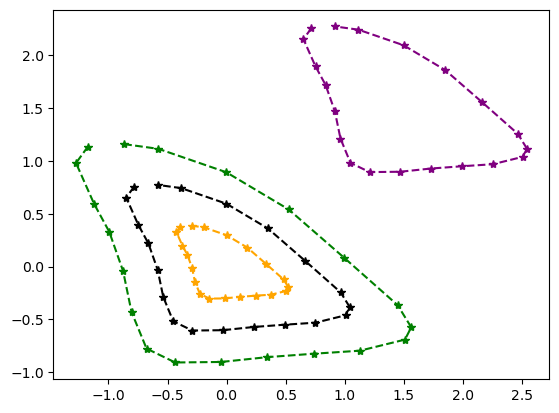

In [29]:
plt.plot(wing[::2], wing[1::2], '--*', color = 'black')
plt.plot(small[::2], small[1::2], '--*', color = 'orange')
plt.plot(large[::2], large[1::2], '--*', color = 'green')
plt.plot(moved[::2], moved[1::2], '--*', color = 'purple')

## check identifiability with other templates

In [30]:
hercules = np.genfromtxt('hercules_forewing_n=20.csv')
helenor = np.genfromtxt('helenor_forewing_n=20.csv')
amathonte = np.genfromtxt('amathonte_forewing_n=20.csv')
rhetenor = np.genfromtxt('rhetenor_forewing_n=20.csv')

species = ['hercules', 'helenor', 'amathonte', 'rhetenor']
data = [hercules, helenor, amathonte, rhetenor]
colors = ['blue', 'green', 'orange', 'purple']

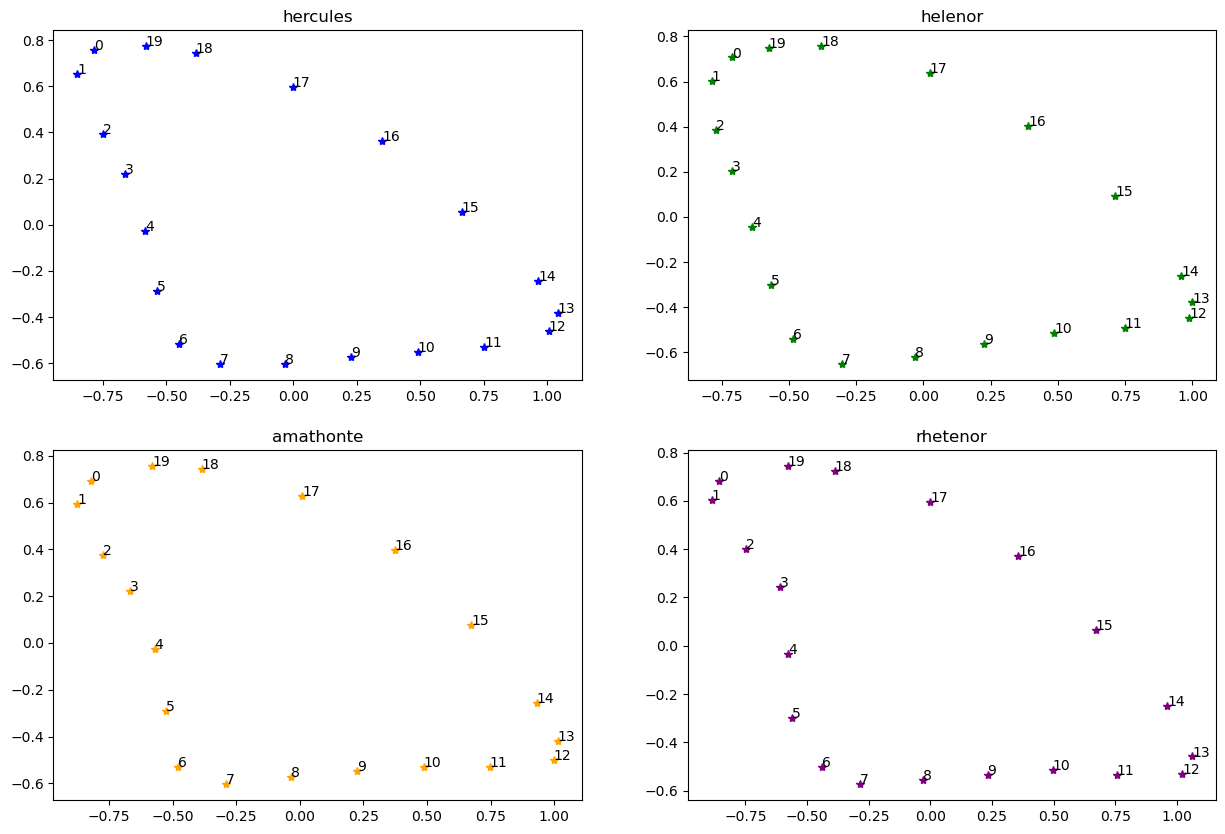

In [31]:
fig, axes = plt.subplots(2,2, figsize = (15,10))
for i, ax in zip(range(len(data)), axes.flat):
    cwing = data[i]
    cspecies = species[i]
    ax.plot(cwing[::2], cwing[1::2], '*', color = colors[i])
    ax.set_title(species[i])
    n = list(range(len(cwing[::2])))
    for j, txt in enumerate(n):
        ax.annotate(txt, (cwing[::2][j], cwing[1::2][j]))


## Check identifiability in circle template

In [32]:
hercules = np.genfromtxt('hercules_forewing_n=20.csv')
circle = np.genfromtxt('circle_n=20_d=2_f1.csv')
data = [hercules, circle]
species = ['hercules', 'circle']
colors = ['blue', 'green', 'orange', 'purple']


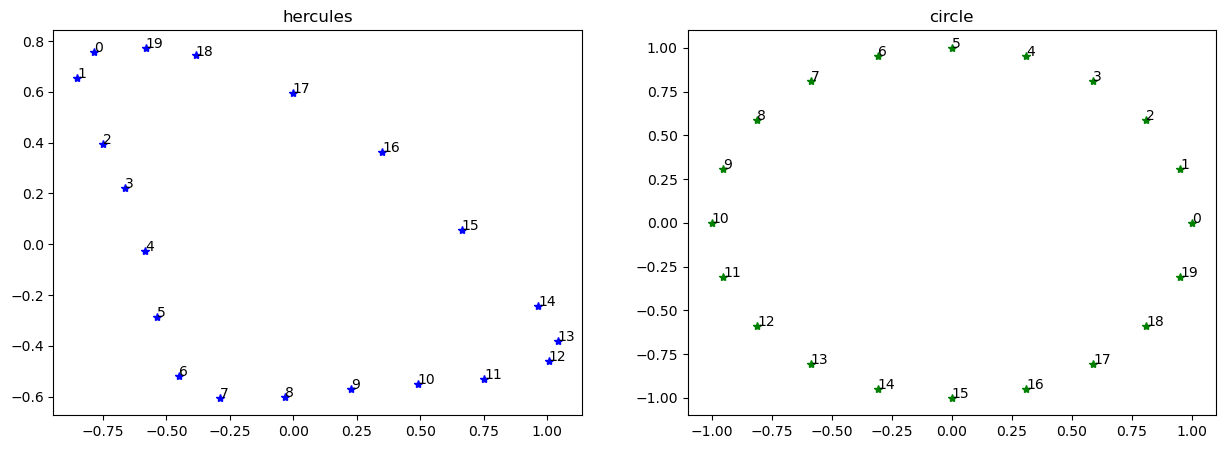

In [33]:
fig, axes = plt.subplots(1,2, figsize = (15,5))
for i, ax in zip(range(len(data)), axes.flat):
    cwing = data[i]
    cspecies = species[i]
    ax.plot(cwing[::2], cwing[1::2], '*', color = colors[i])
    ax.set_title(species[i])
    n = list(range(len(cwing[::2])))
    for j, txt in enumerate(n):
        ax.annotate(txt, (cwing[::2][j], cwing[1::2][j]))

In order to make the circle align to the wing, we need to rotate the indices by 8. 

In [34]:
shift = 8*2
tcirc = circle.copy()
idx = np.array((range(len(tcirc))))
idxs = idx + shift
idxs[-16:] = np.array(range(16))
idxs


array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15])

In [35]:
circle[idxs]

array([-8.09017062e-01,  5.87785184e-01, -9.51056600e-01,  3.09016794e-01,
       -1.00000000e+00, -8.74227766e-08, -9.51056540e-01, -3.09016973e-01,
       -8.09016943e-01, -5.87785363e-01, -5.87785065e-01, -8.09017122e-01,
       -3.09017092e-01, -9.51056480e-01,  1.19248806e-08, -1.00000000e+00,
        3.09017122e-01, -9.51056480e-01,  5.87785482e-01, -8.09016824e-01,
        8.09017241e-01, -5.87784946e-01,  9.51056540e-01, -3.09016943e-01,
        1.00000000e+00,  0.00000000e+00,  9.51056540e-01,  3.09017003e-01,
        8.09017003e-01,  5.87785244e-01,  5.87785244e-01,  8.09017003e-01,
        3.09016973e-01,  9.51056540e-01, -4.37113883e-08,  1.00000000e+00,
       -3.09017032e-01,  9.51056480e-01, -5.87785184e-01,  8.09017003e-01])

In [6]:
circler = np.genfromtxt('circle_rotated_n=20.csv')


In [37]:
data = [hercules, circler] #[hercules, circle[idxs]]
species = ['hercules', 'circle']
colors = ['blue', 'green', 'orange', 'purple']

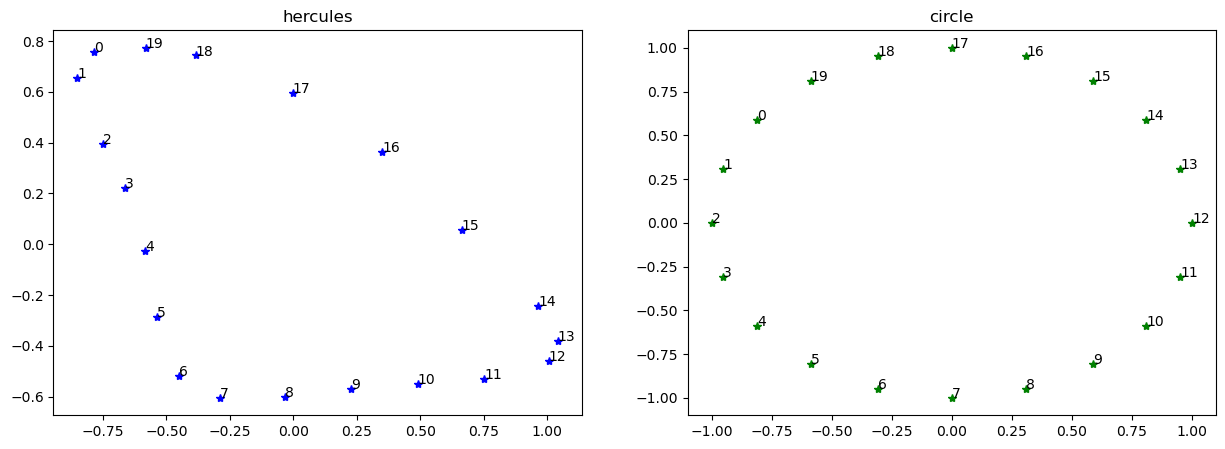

In [38]:
fig, axes = plt.subplots(1,2, figsize = (15,5))
for i, ax in zip(range(len(data)), axes.flat):
    cwing = data[i]
    cspecies = species[i]
    ax.plot(cwing[::2], cwing[1::2], '*', color = colors[i])
    ax.set_title(species[i])
    n = list(range(len(cwing[::2])))
    for j, txt in enumerate(n):
        ax.annotate(txt, (cwing[::2][j], cwing[1::2][j]))

In [39]:
np.savetxt('circle_rotated_n=20.csv', circle[idxs])

In [2]:
circle2 = circle[idxs].copy()*0.35
np.savetxt('circle_rotated_n=20_small.csv', circle2)

NameError: name 'circle' is not defined

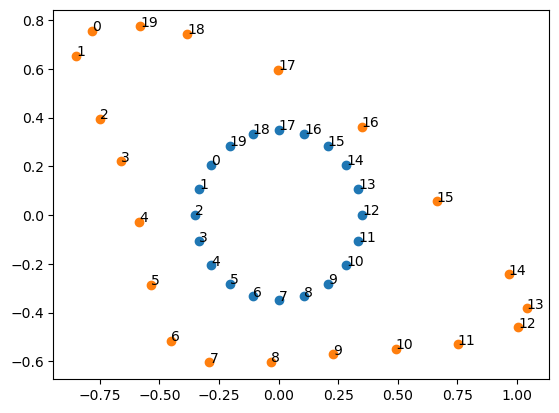

In [41]:
plt.plot(circle2[::2], circle2[1::2], 'o')
n = list(range(len(circle2[::2])))
for j, txt in enumerate(n):
        plt.annotate(txt, (circle2[::2][j], circle2[1::2][j]))
plt.plot(hercules[::2], hercules[1::2], 'o')
for j, txt in enumerate(n):
        plt.annotate(txt, (hercules[::2][j], hercules[1::2][j]))

# Make flat circle

In [9]:
circlee = circler.copy()
circlee[::2] = circlee[::2]*0.7+0.2
circlee[1::2] = circlee[1::2]*0.25
circlee
np.savetxt('circle_ellipsis_n=20.csv', circlee)


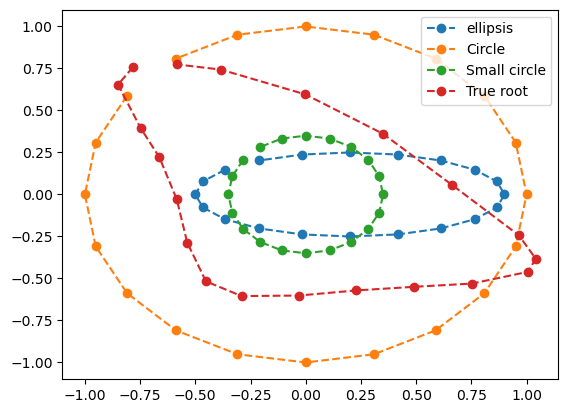

In [81]:
plt.plot(circler[::2]*0.7+0.2, circler[1::2]*0.25, 'o--', label='ellipsis')
plt.plot(circler[::2], circler[1::2], 'o--', label='Circle')
plt.plot(circle2[::2], circle2[1::2], 'o--', label='Small circle')
plt.plot(hercules[::2], hercules[1::2], 'o--', label='True root')
plt.legend()
plt.savefig('../BM4/super_roots.pdf')

In [64]:
pear=[(0,0),(0.5,1),(1,2),(1.5,2.5),(2,3),(2.5,3.5),(3,4),(3.5,4.5),(4,4.7),(4.5,4.5),(5,4),(5.5,3.5),(6,3),(6.5,2.5),(7,2),(7.5,1.5),(8,1),(8.5,0.5),(9,0),(8.5,0.5)]
pear = np.array(pear)


In [77]:
def plot_fish():
    fig, ax = plt.subplots()

    # Fish body outline (polygon for classic outline)
    body_x = [0, 3, 4, 4, 3, 0, -3, -4, -4, -3, 0]
    body_y = [1, 2, 3, 4, 5, 5, 4, 3, 2, 1, 0]
    
    # Tail outline (triangle)
    tail_x = [-4, -5, -5]
    tail_y = [2, 1, 3]

    # Plot fish body outline
    ax.plot(body_x, body_y, color='black','o')

    # Plot fish tail outline
    ax.plot(tail_x, tail_y, color='black', 'o')

    # Fish eye (small circle outline)
    eye_circle = plt.Circle((1.5, 3.5), 0.3, color='black', fill=False, lw=2)
    ax.add_artist(eye_circle)

    # Plot settings
    ax.set_aspect('equal')
    ax.set_xlim(-6, 6)
    ax.set_ylim(-1, 6)
    ax.axis('off')  # Hide the axes for a cleaner look

    plt.show()

# Call the function to plot the fish
plot_fish()

SyntaxError: positional argument follows keyword argument (1200659628.py, line 13)

## Perturb Hercules

In [6]:
perturb = np.random.normal(loc=0.0, scale=.5, size=40)
pwing = wing + perturb

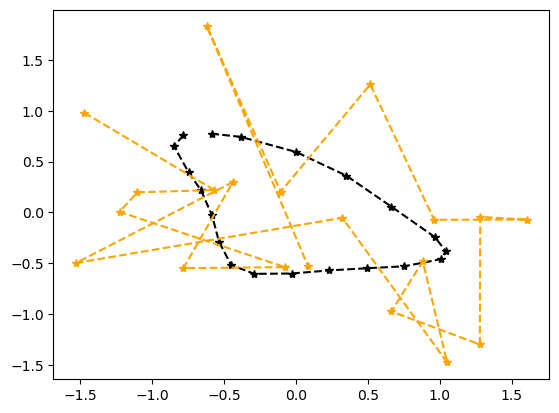

In [7]:
plt.plot(wing[::2], wing[1::2], '--*', color = 'black')
plt.plot(pwing[::2], pwing[1::2], '--*', color = 'orange')

## create triangle for benchmarking

In [22]:
triangle0 = np.array([0,0, 0.2, 0.2, 0.4, 0])
triangle1 = np.array([0.1,0.1, 0.4, 0.2, 0.3, 0.1])

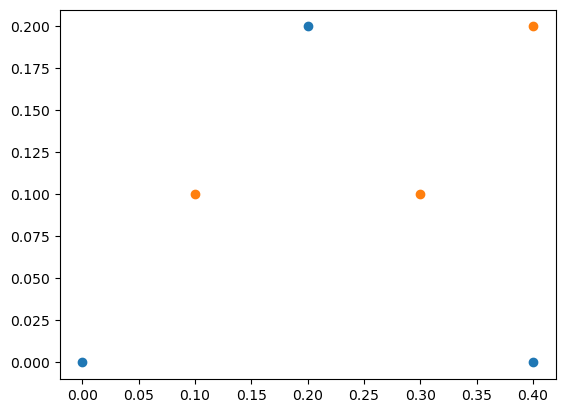

In [23]:
plt.plot(triangle0[::2], triangle0[1::2], 'o')
plt.plot(triangle1[::2], triangle1[1::2], 'o')

In [26]:
np.savetxt('triangle1.csv', triangle0)
np.savetxt('triangle2.csv', triangle1)

In [6]:
data_seeds = np.random.randint(100000000000, size=30)
np.savetxt('../benchmark/dataseeds4.csv', data_seeds, fmt='%i')

In [47]:
data_seeds

array([66093000968, 75251014857])

In [45]:
ds = np.genfromtxt('../benchmark/data_seeds.csv')


In [8]:
import numpy as np
from scipy.stats import mode, uniform
x = uniform.rvs(0,1,100)

In [9]:
np.unique(x)

array([0.02231753, 0.0303343 , 0.03038647, 0.0381175 , 0.05002056,
       0.05271821, 0.05448954, 0.0572953 , 0.09166143, 0.09221922,
       0.09309589, 0.09844803, 0.12904676, 0.1334853 , 0.14836154,
       0.15227464, 0.15304701, 0.1564847 , 0.15871162, 0.16408301,
       0.1805082 , 0.20641933, 0.20716918, 0.22292354, 0.24806674,
       0.24941468, 0.26607254, 0.26704173, 0.27062635, 0.27195135,
       0.28417619, 0.30741668, 0.3096688 , 0.31496484, 0.32206877,
       0.35702148, 0.35705176, 0.35787211, 0.36390338, 0.36796004,
       0.37648328, 0.39284639, 0.43801807, 0.44974653, 0.45345029,
       0.46654109, 0.48979759, 0.50011731, 0.50173243, 0.51013324,
       0.52512944, 0.52745047, 0.54953285, 0.55504941, 0.56346455,
       0.56818815, 0.57283212, 0.57634804, 0.57789689, 0.57864321,
       0.58606272, 0.60780858, 0.6104484 , 0.62914382, 0.63264172,
       0.63595837, 0.6564617 , 0.65931803, 0.66007447, 0.67788506,
       0.69201086, 0.71180915, 0.71338469, 0.71808365, 0.72068

In [10]:
mode(x)

ModeResult(mode=0.02231753117119817, count=1)